<a href="https://colab.research.google.com/github/taha-koroglu/RLC_devreleri/blob/main/kodlar/RLC_devreleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu sayfada kapasitör ve endüktör devre elemanlarını anlamaya çalışıp RC, RL ve RLC devrelerinin basamak ve doğal cevaplarına bakacağız. Bu işlemler için gerekli olan kütüphaneleri dahil edelim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# RC Devresi
Kapasitörün matematiksel modeli

\begin{equation}
i_C(t) = C\frac{dV_C(t)}{dt}
\end{equation}

olarak verilmişti. Bu birinci dereceden adi diferansiyel denklemde eşitliğin her iki tarafının $k=t_0$ anından $k=t$ anına kadar integralini alırsak aşağıdaki çözümü elde ederiz.

\begin{equation}
V_C(t) = V_C(t_0) + \frac{1}{C} \int_{t_0}^{t} i_C(k)dk
\end{equation}

Buradaki $k$ isimli kukla değişkene (**dummy variable**) derslerimizde $\tau$ demiştik. Aşağıda zaman sabiti (**time constant**) kavramı karşımıza çıktığında zaman sabitine $\tau$ diyeceğimizden, bundan sonra karışıklık olmasın diye integral alırken zamanı temsil eden yatay ekseni $k$ notasyonu ile göstereceğiz.

## RC Devresinin Basamak Cevabı
Şimdi, *Şekil 1*'de gördüğümüz üzere bir güç kaynağı, bir rezistör ve bir kapasitörden oluşan RC devresinin basamak cevabını$^{1}$ analiz edelim.

<img src="https://drive.google.com/uc?export=view&id=1Tfbp2MS9zXmIg9ND0nssQwn7w5kWTo3E" alt="RC devresi." height="400"/>

*Şekil 1:* RC devresi.

Devrede ok yönünde dolaşıp Kirchoff'un Gerilimler Yasasını (KGY) uygularsak elde edeceğimiz denklem aşağıdaki gibi olur.

\begin{equation}
-V_{cc} + Ri(t) + V_C(t) = 0
\end{equation}

Devremizde kapasitörün üzerinden geçen akım $i_C(t)$ devrede dolaşan akım $i(t)$'ye eşit (i.e., $i_C(t) = i(t)$). Bunu göz önünde bulundurarak yukarıda elde ettiğimiz ilk denklem olan kapasitörün matematiksel modelini KGY ile elde ettiğimiz denklemde yerine koyacak olursak

\begin{equation}
-V_{cc} + RC\frac{dV_C(t)}{dt} + V_C(t) = 0
\end{equation}

birinci dereceden adi diferansiyel denklemini elde ederiz. Bu denklemi düzenlersek

\begin{equation}
\frac{dV_C(t)}{dt} = -\frac{1}{RC}(V_C(t)- V_{cc})
\end{equation}

haline gelir. Biraz daha manipüle edersek

\begin{equation}
\frac{dV_C(t)}{V_C(t)- V_{cc}} = -\frac{1}{RC}dt
\end{equation}

denklemini elde ederiz. Eşitliğin her iki tarafının integralini $k=t_0$'dan $k=t$ anına kadar alalım.

\begin{equation}
\int_{k=t_0}^{k=t}\frac{dV_C(k)}{V_C(k)- V_{cc}} = -\frac{1}{RC}\int_{k=t_0}^{k=t}dk
\end{equation}

Dikkat edilirse soldaki ifade doğal logaritma ile alakalı bir integral. İntegralleri alarak ilerleyecek olursak

\begin{equation}
\ln(V_C(k)- V_{cc})\Big|_{k=t_0}^{k=t} = -\frac{1}{RC}k\Bigg|_{k=t_0}^{k=t}
\end{equation}

\begin{equation}
\ln(V_C(t)- V_{cc}) - \ln(V_C(t_0)- V_{cc}) = -\frac{1}{RC}(t-t_0)
\end{equation}

soldaki doğal logaritma içeren ifadelerle yapılan çıkarma işlemi, aşağıdaki halini alırken

\begin{equation}
\ln\Bigg(\frac{V_C(t)- V_{cc}}{V_C(t_0)- V_{cc}}\Bigg) = -\frac{t-t_0}{RC}
\end{equation}

her iki tarafı $e \approx 2.71$'in üssü olarak yazarsak (birşey değişmeyeği gibi sol taraftaki doğal logaritma $\ln$ ifadesinden kurtulmuş olacağız)

\begin{equation}
\frac{V_C(t)- V_{cc}}{V_C(t_0)- V_{cc}} = e^{\textstyle -\frac{t-t_0}{RC}}
\end{equation}

en sonunda aşağıdaki çözümü elde ederiz.

\begin{equation}
V_C(t) = V_{cc} + V_C(t_0)e^{\textstyle-\frac{t-t_0}{RC}} - V_{cc}e^{\textstyle-\frac{t-t_0}{RC}}
\end{equation}

Genelde $t_0 = 0$ olarak kabul ettiğimizden elde ettiğimiz çözüm aşağıdaki son halini alırken

\begin{equation}
V_C(t) = V_{cc} + V_C(0)e^{\textstyle-\frac{t}{RC}} - V_{cc}e^{\textstyle-\frac{t}{RC}}
\end{equation}

Aşağıda grafiğini çizdireceğimiz kapasitörün üzerindeki voltajın matematiksel ifadesi olan bu ifade hakkında hemen kabaca (yani ekstrem değerlere bakarak) düşünecek olursak $t = 0$ anında $V_C(0) = V_C(0)$ ve $t \rightarrow \infty$ durumunda $V_C(\infty) = V_{cc}$ olduğunu görebiliriz. Ayrıca zaman sabitimiz olan $\tau = RC$ arttıkça $V_C(t)$'nin $V_{cc}$'ye ulaşması yavaşlarken $\tau$ azalırken $V_C(t)$'nin $V_{cc}$'ye ulaşması hızlanır.

Şimdi elde ettiğimiz çözümün değişik R ve C değerlerine göre grafiklerini çizdirelim ve zaman sabitinin kapasitörün voltajına olan etkisini görelim.

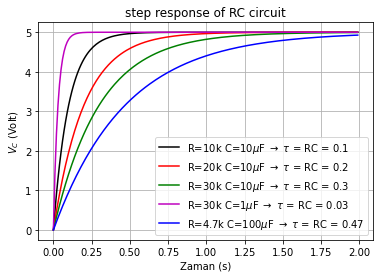

In [2]:
Vcc = 5.0
Vc0 = 0.0
R1 = 1e4 # 10k
C1 = 1e-5 # 10uF
R2 = 2*R1
C2 = C1
R3 = 3*R1
C3 = C1
R4 = R3
C4 = 0.1*C1
R5 = 4.7e3
C5 = 10*C1

t = np.arange(0.0, 2.0, 0.01)
Vc1 = Vcc + Vc0*np.exp(-t/(R1*C1)) - Vcc*np.exp(-t/(R1*C1))
Vc2 = Vcc + Vc0*np.exp(-t/(R2*C2)) - Vcc*np.exp(-t/(R2*C2))
Vc3 = Vcc + Vc0*np.exp(-t/(R3*C3)) - Vcc*np.exp(-t/(R3*C3))
Vc4 = Vcc + Vc0*np.exp(-t/(R4*C4)) - Vcc*np.exp(-t/(R4*C4))
Vc5 = Vcc + Vc0*np.exp(-t/(R5*C5)) - Vcc*np.exp(-t/(R5*C5))
fig, ax = plt.subplots()
ax.plot(t, Vc1, 'k', label='R=10k C=10$\mu$F $\\rightarrow$ $\\tau$ = RC = 0.1')
ax.plot(t, Vc2, 'r', label='R=20k C=10$\mu$F $\\rightarrow$ $\\tau$ = RC = 0.2')
ax.plot(t, Vc3, 'g', label='R=30k C=10$\mu$F $\\rightarrow$ $\\tau$ = RC = 0.3')
ax.plot(t, Vc4, 'm', label='R=30k C=1$\mu$F $\\rightarrow$ $\\tau$ = RC = 0.03')
ax.plot(t, Vc5, 'b', label='R=4.7k C=100$\mu$F $\\rightarrow$ $\\tau$ = RC = 0.47')
ax.set(xlabel='Zaman (s)', ylabel='$V_C$ (Volt)',
       title='step response of RC circuit')
ax.grid()
legend = ax.legend(loc='lower right')
#plt.show()
#fig.savefig("RC devresi zorlanmış cevap.png")
#files.download("RC devresi zorlanmış cevap.png")

# RL Devresinin Doğal Cevabı
Yukarıda Şekil 1'de gördüğümüz RC devresinde devreye bağlı bir güç kaynağı vardı. Bu DC gerilim kaynağının $t=0$ anında devreye bağlanmasıyla (bir anahtar yardımıyla) kapasitör üzerine düşen voltajın $V_C(t)$ değişimini görsel olarak analiz ettik ve 

\begin{equation}
\lim_{t\rightarrow\infty} V_C(t) = V_{cc}
\end{equation}

olduğunu gözlemledik. Şimdi 

# Dipnotlar
$^1$ İng. Step response. Basamak cevabı [1]'de geçen bir kavramdır. Aynı kaynağı referans kullanan [2], bu cevabı zorlanmış cevap diye isimlendirerek yaklaşımı daha genelleştirmiştir (i.e., güç kaynağından devreye etki eden sinyalin sadece sabit bir DC gerilim olma şartı yok). Biz burada [1]'de geçen haliyle kullanmayı uygun gördük. 

# Referanslar
[1] J. W. Nilsson, S. A. Riedel, *Electric Circuits*, 10. Baskı, Prentice Hall, Upper Saddle River, New Jersey, 2014.

[2] M. Ö. Efe, *Devre Analizi-I*, 3. Baskı, Seçkin Yayıncılık, Ankara, 2016.